**基础术语**

- **数据挖掘定义**

  > 数据挖掘: 起源与多个学科， 比如建模部分起源于统计学和机器学习。
  >
  > 统计学----以数据模型为驱动，常常建立一个能够产生数据的模型。
  >
  > 机器学习 --- 以算法为驱动，让计算机执行算法来发现知识， 自我学习。

- 数据挖掘是指正在大型的数据仓库张对有价值的信息知识进行获取，其方法一种是分类分析，一种是聚类.
  - 数据初期的准备通常占用整个数据挖掘项目工作的70%左右。
  - 数据挖掘本身融合了统计学， 数据库和机器学习等学科， 并不是新的技术。
  - 数据挖掘更适合业务人员来学习(相比技术人员学习业务来的更高效)
  - 数据挖掘适用于传统的BI(报表，OLAP等)无法支持的领域
- 数据挖掘工作领域大致分为三大类:
  - 数据分析师: 在拥有行业数据的电商, 金融, 电信, 咨询等行业做业务咨询, 商务智能, 分析报告.
  - 数据挖掘工程师: 在多媒体, 电商, 搜索, 社交等大数据相关行业做机器学习算法实现和分析.
  - 科学研究方向: 在高校, 科研单位, 企业研究院校等高大上科研机构研究算法效率改进以及未来应用.
  
- **数据挖掘的两个基本目标:**
 > - 预测数据   ---  监督学习(supervised learning) 其中包括 回归, 分类等算法
 > - 描述数据   ---  无监督学习(unsupervised learning) 其中包括 聚类, 关联规则发现等算法
- **机器学习**: 利用经验, 通过计算, 构建模型, 来改善系统自身性能.
经验: 认为的, 报告调参, 特征选择, 模型选择是通过博士, 大牛或者总监开会得出.
计算: 一种是计算平台, 包括大数据Hadoop或者 Spark, tf 等. 另一种是计算模型RF, xgb
构建模型: 基本的5步骤
算法本身就是设定一个计算程序可以自主学习任务T的经验E, 使得该程序逐步提高.
- **属性(特征)**: 描述食物在特定方面的性质的事项
   属性值: 属性上的取值.
   属性空间(输入空间): 由属性张成的空间, 属性空间 $x$.
- 记录（样本）: 一个具体事物的属性描述, 由属性向量表示, 第$j$个记录$x_j$的属性向量

$$x_j = (x_j^{(1)}, x_j^{(2)}, ... , x_j^{(i)}, x_j^{(n)})^T , j = 1,2, ... N;    x_j \epsilon \chi$$

- **标记**:描述事物某个特征的事项.
  标记值: 标记上的取值.
  标记空间（输出空间）: 所有标记的集合， 标记空间 $Y$.
- **数据集**:

  记录的集合(无监督)，$ D = {x_1, x_2, .... , x_N};$
 
  样例的集合(有监督), $ D = {(x_1, y_1), (x_2, y_2), .... , (x_N, y_N)};$
- 回归: 有监督学习中，标记为连续值, $y=R$
  分类: 有监督学习中，标记为离散值，其中  $|y| = 2, y ={0, 1}或y= {+1, -1}为二分类; |y| > 2, y+{c_1, c_2, ... ,c_n} 为多分类$
  
- 流出法: 将数据集D 划分为两个互斥的集合，其中一个集合作为训练集，另一个作为测试集合. 在训练模型，在测试集上测试误差，作为对泛华能力的评估.

- 训练数据集: 用以训练模型的数据集的子集， $D_traing \in D$

  测试数据集: 应用测试模型的数据集的子集， $D_testing \in D$
  
$$
线性回归的目标函数为:
   J(\theta) = \frac{1}{2}\displaystyle(h_{\theta}(x^{(i)}) - y^{(i)})^2
$$

$$
将目标函数增加平方和损失:
   J(\theta) = \frac{1}{2}\displaystyle(h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda \displaystyle \theta_j^2
$$

In [10]:
# 代码部分
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 分割数据集的方法
%matplotlib inline


In [3]:
# 读取数据集
fruits_df = pd.read_table('../data/fruit_data_with_colors.txt')
fruits_df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
# 创建目标标签和名称的字典
fruit_name_dict = dict(zip(fruits_df['fruit_label'], fruits_df['fruit_name']))
fruit_name_dict

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [12]:
# 划分数据类
X = fruits_df[['mass', 'width', 'height', 'color_score']]
y = fruits_df['fruit_label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/4, random_state=0)
print('数据集样本:{}, 训练集样本数: {}, 测试集合样本数: {}'.format(len(X), len(X_train), len(X_test)))

数据集样本:59, 训练集样本数: 44, 测试集合样本数: 15


In [17]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


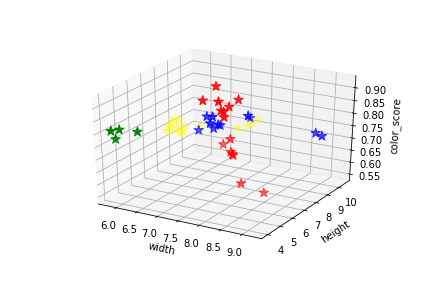

In [21]:
import matplotlib as mpl
label_color_dict = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow'}
colors = list(map(lambda label: label_color_dict[label], y_train))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=colors, marker='*', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [23]:
# 选择/ 建立模型
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
# 练模型
knn.fit(X_train, y_train)
# 5 测试模型
y_pred = knn.predict(X_test)
print(y_pred)

[3 3 4 4 1 1 3 4 1 4 2 1 1 1 1]


In [24]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print('准确率:', acc)

准确率: 0.6


<IPython.core.display.Javascript object>


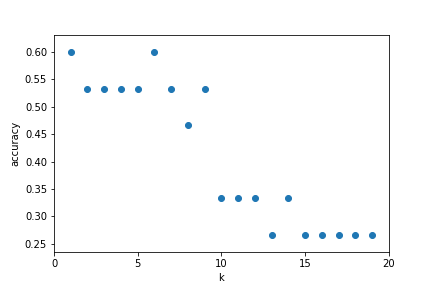

In [26]:
k_range = range(1, 20)
acc_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)   # 三 选择/建立模型
    knn.fit(X_train, y_train) # 四. 训练模型: 模型已经训练ok了
    acc_scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, acc_scores) # 散点图
plt.xticks([0, 5 ,10, 15, 20])
plt.show()